 # Collecting Tweets Related to Stock Market

Assignment 01 <br>
Course: CBD 3335 Data Mining and Analysis

Group Members:

* Ashvin Alex
* Bastian Castillo
* Fadernel Bedoya
* Darshan Ruparel
* Marcelo Munoz

The Twitter Developer V2 API allows you to get data from Twitter using a variety of endpoints. To use the API, you'll first need to create a Twitter Developer account and a project within that account. Then, you'll need to generate API keys and tokens, which are unique to your app and are used to authenticate your API requests.

Once you have your API keys and tokens, you can choose the endpoint that corresponds to the data you want to access, such as the "tweets" endpoint for getting data about a specific user's tweets. You'll need to build your API request, which includes specifying the endpoint URL, any query parameters to filter your results, and your API keys and tokens for authentication.

You can send your API request using a programming language like Python or a tool like Postman. When you receive a response from Twitter, it will be in JSON format, which you can parse using a programming language to extract the data you're interested in.

## 1 - Installing and Importing Required Libraries

In [175]:
import requests
import pandas as pd
import csv
import itertools
import re
import string
!pip install emoji
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


## 2 - Collecting data and Saving Data

In [440]:
# -- Add AUTH TOKEN HERE -- #  
bearer_token = "<ADD AUTH TOKEN>"
headers = {"Authorization": f"Bearer {bearer_token}"}

Here for this example we will be using  collecting data we will be using twitter v2 API that allows us to get data using
<b> tweets/search/recent</b> end point.
for collecting and saving the data, we have defined a function that calls search api for each of keywords, with the specified 
filters passed as query_params, we have a limit of 100 tweets per request, so response json is parsed and converted into a pandas 
data-frame then appended to respective csv file.

In [436]:
def getData():
    sources = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'APPL', 'GOOG', 'YHOO']
    start_date=['2023-03-12T22:40:00Z',]
    end_date=['2023-03-13T01:40:00Z',]
    url="https://api.twitter.com/2/tweets/search/recent"
    for source in sources:
        for start, end in zip(start_date,end_date):
            query_params = {
                        "query": f'{source} -is:retweet',
                        "max_results": 100,
                        "tweet.fields": "created_at,author_id",
                        "start_time": start,
                        "end_time": end,
                        "type":source
                }
           
            response = requests.get(url,headers=headers,params=query_params,)

            if response.status_code != 200:
                    raise Exception(
                        f"Request returned an error: {response.status_code}, {response.text}"
            )

            json_response = response.json()
            data = []
            for tweet in json_response["data"]:
                row = {
                    "id": str(tweet["id"]),
                    "text": tweet["text"],
                    "author_id":str(tweet["author_id"]),
                    "created_at": tweet["created_at"],
                }
                data.append(row)

            df = pd.DataFrame(data)
            df.to_csv(f'{source}')
            df.to_csv(f'{source}.csv',mode='a', header=False,index=False)
        

In [176]:
sources = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog', 'Yahoo'] 

In [177]:
#--Function call---
#getData()

In the below step we are aggregating all the data into single dataframe to further processing

In [178]:

# Define a list of filenames and columns
filenames = ['Altcoin.csv', 'APPL.csv', 'Bitcoin.csv', 'Coindesk.csv', 'Cryptocurrency.csv', 'Gold.csv', 'GOOG.csv', 'YHOO.csv']
columns = ['id', 'text', 'author_id', 'created_at', 'type']

# Read each file and rename columns
dfs = []
for filename in filenames:
    df = pd.read_csv(filename)
    df.columns = columns
    dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)
df['text'] = df['text'].astype(str)
df

,id,text,author_id,created_at,type
0,1638710000000000000,@TreatsBot $paw #paw #altcoin https://t.co/XRC...,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,#Ethereum price update: \n\n#ETH $1632.3 USD\n...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
2,1630320000000000000,#BinanceCoin price update: $BNB\n\n#BNB $304.7...,1762930000000000000,2023-02-28T01:38:44.000Z,Altcoin
3,1632580000000000000,@stackhodler You can earn $500-$1000 daily tra...,1338750000000000000,2023-02-28T01:38:23.000Z,Altcoin
4,1630160000000000000,@saylor @AmritaAhuja You can earn $500-$1000 d...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,@SweetatHeart2 Anger behind this reply yhoo ta...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,Tonight's Oscars *champagne* carpet is already...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,Surprise! Lady Gaga is performing #HoldMyHand ...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,$AAPL got a couple votes of confidence from an...,19546277,2023-03-12T22:42:12.000Z,Yahoo


## 3 - Cleaning data 

### Remove Duplication

In [179]:
duplicate = df[df.duplicated(['id'], keep=False)]
duplicate

,id,text,author_id,created_at,type
2,1630320000000000000,#BinanceCoin price update: $BNB\n\n#BNB $304.7...,1762930000000000000,2023-02-28T01:38:44.000Z,Altcoin
3,1632580000000000000,@stackhodler You can earn $500-$1000 daily tra...,1338750000000000000,2023-02-28T01:38:23.000Z,Altcoin
7,1633360000000000000,@AltcoinDailyio You can earn $500-$1000 daily ...,901091000000000000,2023-02-28T01:37:18.000Z,Altcoin
8,1637080000000000000,@CryptoKaleo You can earn $500-$1000 daily tra...,959758000000000000,2023-02-28T01:36:58.000Z,Altcoin
9,1635980000000000000,#Ethereum price update: \n\n#ETH $1632.69 USD\...,968331000000000000,2023-02-28T01:36:47.000Z,Altcoin
...,...,...,...,...,...
4773,1635091512949360000,#Ethereum price update: \n\n#ETH $1616.97 USD\...,1551067188882110000,2023-03-13T01:32:49.000Z,NaN
5692,1634730850779820000,@Superalkaline11 @Xx17965797N lol bitcoin does...,1187619061,2023-03-12T01:39:41.000Z,Gold
5736,1634730628641060000,SEBA bank offers token for digital ownership o...,1439645784966820000,2023-03-12T01:38:48.000Z,Gold
5799,1635093245473710000,@JonathanDenso13 @ShibeMagazine @patricklodder...,1356059515817320000,2023-03-13T01:39:42.000Z,Gold


In [180]:
df.drop_duplicates(['id'],keep=False, inplace=True)
df

,id,text,author_id,created_at,type
0,1638710000000000000,@TreatsBot $paw #paw #altcoin https://t.co/XRC...,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,#Ethereum price update: \n\n#ETH $1632.3 USD\n...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,@saylor @AmritaAhuja You can earn $500-$1000 d...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,#Ethereum price update: \n\n#ETH $1630.52 USD\...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,@rovercrc You can earn $500-$1000 daily tradin...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,@SweetatHeart2 Anger behind this reply yhoo ta...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,Tonight's Oscars *champagne* carpet is already...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,Surprise! Lady Gaga is performing #HoldMyHand ...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,$AAPL got a couple votes of confidence from an...,19546277,2023-03-12T22:42:12.000Z,Yahoo


### Remove numbers in tweets

In [181]:
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,@TreatsBot $paw #paw #altcoin https://t.co/XRC...,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,#Ethereum price update: \n\n#ETH $. USD\n#Bitc...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,@saylor @AmritaAhuja You can earn $-$ daily tr...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,#Ethereum price update: \n\n#ETH $. USD\n#Bitc...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,@rovercrc You can earn $-$ daily trading altco...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,@SweetatHeart Anger behind this reply yhoo tak...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,Tonight's Oscars *champagne* carpet is already...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,Surprise! Lady Gaga is performing #HoldMyHand ...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,$AAPL got a couple votes of confidence from an...,19546277,2023-03-12T22:42:12.000Z,Yahoo


### Remove URLS and Links

In [182]:
def clean_url(data):
    data=re.sub(r"((https|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
df['text'] = df['text'].apply(lambda x: clean_url(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,@TreatsBot $paw #paw #altcoin,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,#Ethereum price update: \n\n#ETH $. USD\n#Bitc...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,@saylor @AmritaAhuja You can earn $-$ daily tr...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,#Ethereum price update: \n\n#ETH $. USD\n#Bitc...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,@rovercrc You can earn $-$ daily trading altco...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,@SweetatHeart Anger behind this reply yhoo tak...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,Tonight's Oscars *champagne* carpet is already...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,Surprise! Lady Gaga is performing #HoldMyHand ...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,$AAPL got a couple votes of confidence from an...,19546277,2023-03-12T22:42:12.000Z,Yahoo


### Remove Punctuations

In [183]:
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['text']= df['text'].apply(lambda x: remove_punctuations(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,TreatsBot paw paw altcoin,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,Ethereum price update \n\nETH USD\nBitcoin B...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,saylor AmritaAhuja You can earn daily trading...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,Ethereum price update \n\nETH USD\nBitcoin B...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,rovercrc You can earn daily trading altcoin f...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,SweetatHeart Anger behind this reply yhoo take...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,Tonights Oscars champagne carpet is already bu...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,Surprise Lady Gaga is performing HoldMyHand at...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,AAPL got a couple votes of confidence from ana...,19546277,2023-03-12T22:42:12.000Z,Yahoo


### Remove anything word with length less than 2

In [184]:
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) >= 2])
df['text'] = df['text'].apply(lambda x: remove_short_words(x))

## Additional Preprocessing 
 * convert text into lower case
 * removes any html tags
 * newline character 

In [185]:
def preprocess_data(text):
    #lowers the text
    text = str(text).lower()
    #removes any html tags
    text = re.sub('<.*?>+', '', text)
    #removes any newline character 
    text = re.sub('\n', '', text)
    return text

df['text'] = df['text'].apply(lambda x: preprocess_data(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,treatsbot paw paw altcoin,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,ethereum price update eth usd bitcoin btc foll...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,saylor amritaahuja you can earn daily trading ...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,ethereum price update eth usd bitcoin btc foll...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,rovercrc you can earn daily trading altcoin fu...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,sweetatheart anger behind this reply yhoo take...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,tonights oscars champagne carpet is already bu...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,surprise lady gaga is performing holdmyhand at...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,aapl got couple votes of confidence from analy...,19546277,2023-03-12T22:42:12.000Z,Yahoo


### Remove Emoji

In [186]:
def remove_emoji(text):
    return emoji.replace_emoji(text, '')
   
df['text'] = df['text'].apply(lambda x: remove_emoji(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,treatsbot paw paw altcoin,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,ethereum price update eth usd bitcoin btc foll...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,saylor amritaahuja you can earn daily trading ...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,ethereum price update eth usd bitcoin btc foll...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,rovercrc you can earn daily trading altcoin fu...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,sweetatheart anger behind this reply yhoo take...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,tonights oscars champagne carpet is already bu...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,surprise lady gaga is performing holdmyhand at...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,aapl got couple votes of confidence from analy...,19546277,2023-03-12T22:42:12.000Z,Yahoo


## Remove Anything other than English Letters

In [187]:
def remove_nonalpha(data):
    return re.sub("[^a-zA-Z<>]", ' ', data)
df['text'] = df['text'].apply(lambda x: remove_nonalpha(x))
df

,id,text,author_id,created_at,type
0,1638710000000000000,treatsbot paw paw altcoin,1512950000000000000,2023-02-28T01:39:04.000Z,Altcoin
1,1636160000000000000,ethereum price update eth usd bitcoin btc foll...,537863000000000000,2023-02-28T01:38:48.000Z,Altcoin
4,1630160000000000000,saylor amritaahuja you can earn daily trading ...,919537000000000000,2023-02-28T01:38:02.000Z,Altcoin
5,1638430000000000000,ethereum price update eth usd bitcoin btc foll...,1125560000000000000,2023-02-28T01:37:47.000Z,Altcoin
6,1639020000000000000,rovercrc you can earn daily trading altcoin fu...,85308500000000000,2023-02-28T01:37:44.000Z,Altcoin
...,...,...,...,...,...
7700,1635051279390220000,sweetatheart anger behind this reply yhoo take...,1086317150665660000,2023-03-12T22:52:57.000Z,Yahoo
7701,1635051172506770000,tonights oscars champagne carpet is already bu...,19380829,2023-03-12T22:52:31.000Z,Yahoo
7702,1635048789877850000,surprise lady gaga is performing holdmyhand at...,17852343,2023-03-12T22:43:03.000Z,Yahoo
7703,1635048575196360000,aapl got couple votes of confidence from analy...,19546277,2023-03-12T22:42:12.000Z,Yahoo


## 4 - Data Visualization

### Count of Tweets by Keyword

In [189]:
daily_counts = df.groupby(['created_at', 'type']).size().unstack(fill_value=0)

daily_counts

type,Altcoin,Appl,Bitcoin,Coindesk,Cryptocurrency,Gold,Goog,Yahoo
created_at,,,,,,,,
01-03-2023,40,47,0,100,100,99,82,46
02-03-2023,42,31,0,100,97,100,100,33
05-03-2023,0,31,0,0,0,0,39,23
06-03-2023,38,26,0,100,98,99,65,59
07-03-2023,47,57,0,100,99,99,136,74
08-03-2023,47,45,0,100,99,98,75,56
09-03-2023,41,47,0,100,94,99,107,69
10-03-2023,27,35,0,100,99,100,101,100
11-03-2023,43,32,0,124,98,99,100,86


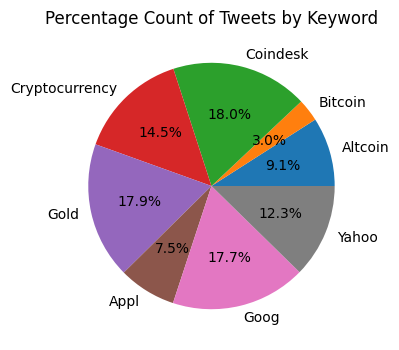

In [190]:
daily_counts = df.groupby(['created_at', 'type']).size().unstack(fill_value=0)

# Filter the daily_counts DataFrame to only include the sources in the 'sources' list
daily_counts = daily_counts[sources]

# Compute the total count for each source
source_counts = daily_counts.sum()

# Create a pie chart of the total count for each source
plt.figure(figsize=(4, 4))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title('Percentage Count of Tweets by Keyword')
plt.show()


The above pie chart illustrates the percentage of the count of tweets per eight different keywords. CoinDesk, gold, and google stock tweets contribute 50% of the total tweets, so people are interested more in these areas. Cryptocurrency and Yahoo stocks are discussed almost equivalently, with 14.5% and 12.3%, respectively. The Bitcoin keyword contains the fewest tweets, showing people are less interested in Bitcoin.

### Unique Users by Keyword

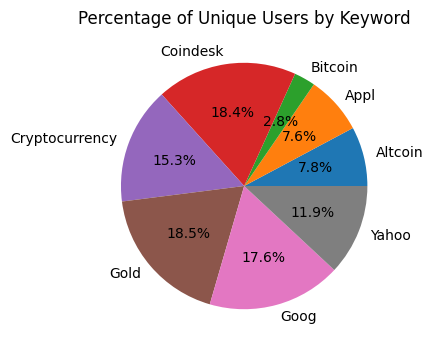

In [191]:
user_counts = df.groupby(['type', 'author_id'])['author_id'].nunique()

# Create a new DataFrame that contains the count of unique users for each source
source_user_counts = user_counts.groupby('type').count()

# Create a pie chart of the count of unique users for each source
plt.figure(figsize=(4, 4))
plt.pie(source_user_counts, labels=source_user_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Unique Users by Keyword')
plt.show()

The percentage of unique users per term is shown in the above graph.
Gold, cryptocurrency, and Google stock on the rising side can all be followed in this area in a trend that is more or less identical.
Bitcoin shares higher values with the plot's fewest tweets since so few people are interested in it.

### Unique Users by Keyword and Date

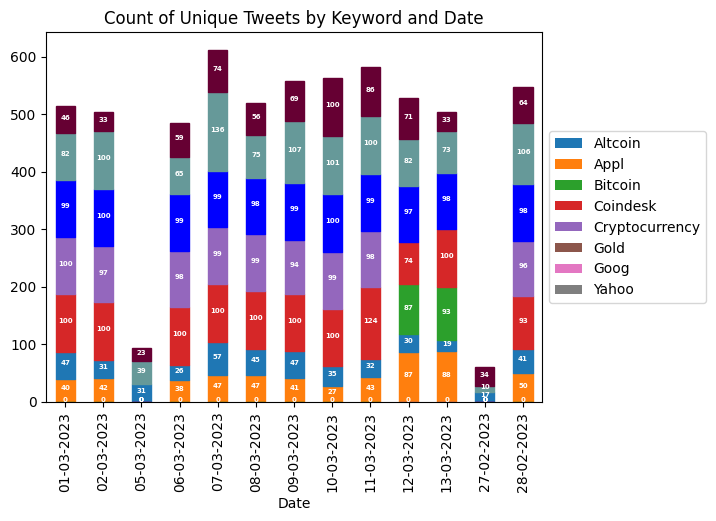

In [192]:
ax =pd.crosstab(df.created_at,df.type, rownames=['Date'],colnames=['Type']).plot.bar(stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
colors = ['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#9467BD', '#0000ff', '#669999', '#660033']
for i, bar in enumerate(ax.containers):
    for rect in bar:
        rect.set_color(colors[i % len(colors)])
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 5)
plt.title('Count of Unique Tweets by Keyword and Date')
plt.show()

It is evident that CoinDesk does most tweets in the above pie chart, and the graph and Bitcoin contain the least number of tweets. So maybe there was high demand for CoinDesk, or could be more fluctuations in those stocks during that period. The highest number of tweets was made on 6th March 2023. It seems there was a holiday on 5th March 2023 and 27th Feb 2023, as there are fewer tweets which means there was no update in the stock market.



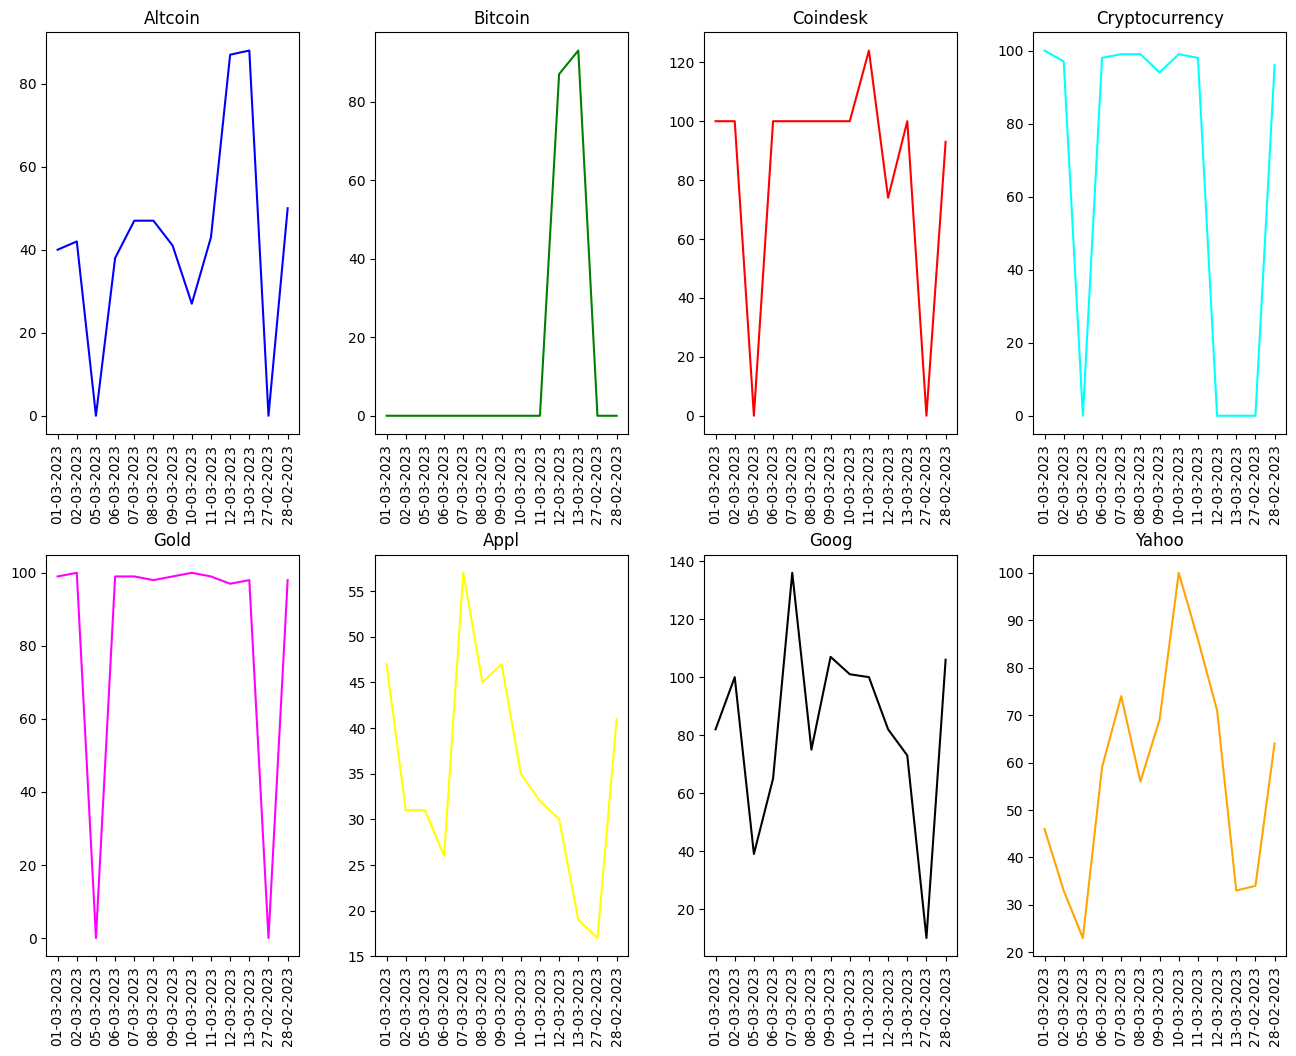

In [193]:
daily_counts = df.groupby(['created_at', 'type']).size().unstack(fill_value=0)

# Filter the daily_counts DataFrame to only include the sources in the 'sources' list
daily_counts = daily_counts[sources]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
# Create the subplots and plot each source on a separate subplot
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
for i, s in enumerate(sources):
    row = i // 4
    col = i % 4
    ax[row, col].plot(daily_counts.index, daily_counts[s],color=colors[i])
    ax[row, col].set_title(s)
    ax[row, col].set_xticks(ax[row, col].get_xticks()[::len(daily_counts)//10])
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

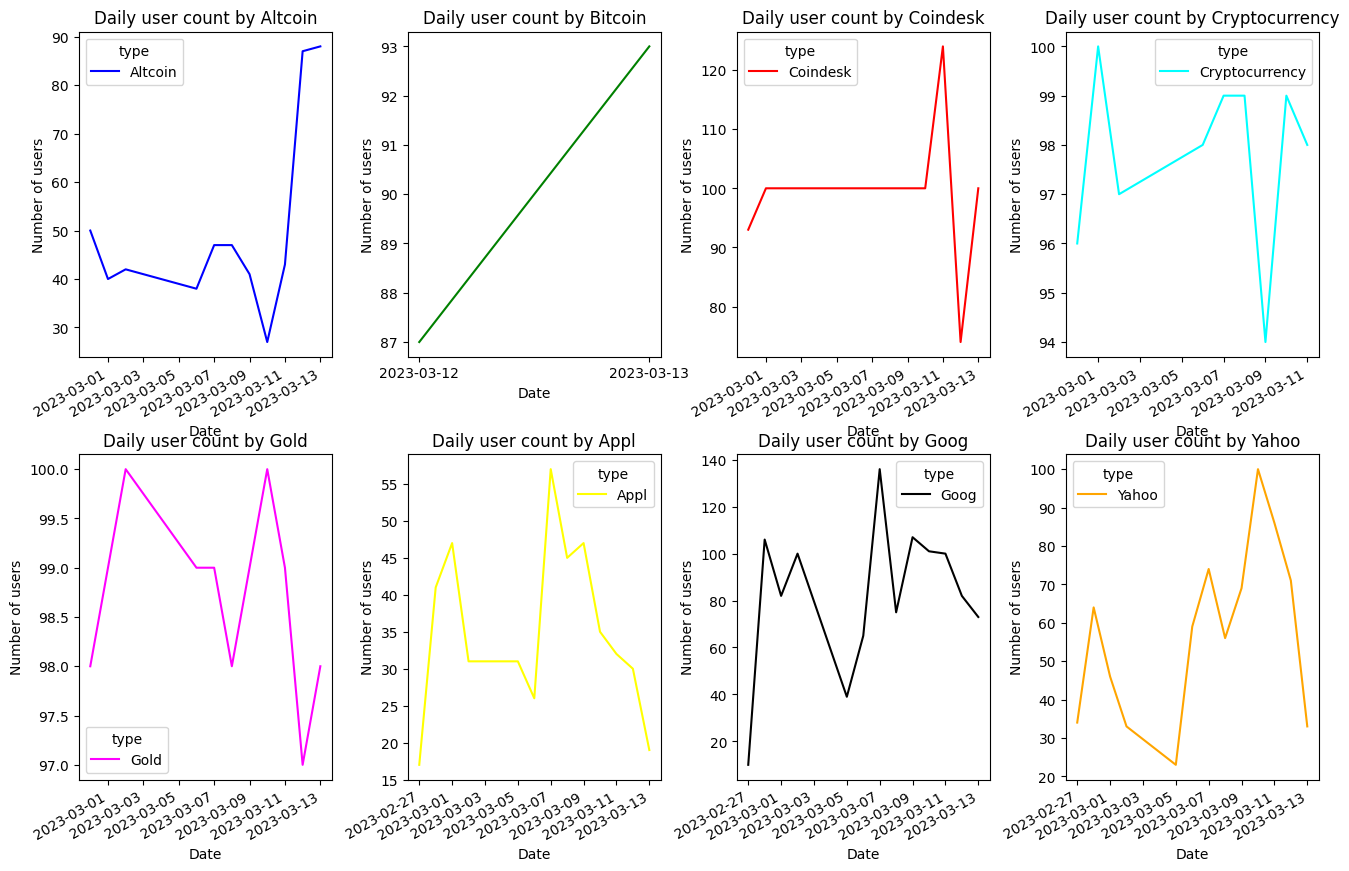

In [194]:
sources = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog', 'Yahoo']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 11))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
for i, s in enumerate(sources):
    daily_user_sum = df[df['type']==s].groupby(['created_at', 'type']).agg({'author_id': 'count'})
    daily_user_sum = daily_user_sum.reset_index()
    
    daily_user_sum.index = pd.to_datetime(daily_user_sum.created_at,dayfirst=True)
    
    # Pivot the data to have one column per type
    daily_user_sum = daily_user_sum.pivot(columns='type', values='author_id')
    
    row = i // 4
    col = i % 4
    
    if row == 0 and col == 1:
        ax[row][col].plot(daily_user_sum, color=colors[i])
        ax[row][col].set_xticks(daily_user_sum.index)   
    else:    
        daily_user_sum.plot(ax=ax[row, col], color=colors[i])
    
    #daily_user_sum.plot(ax=ax[row, col], color=colors[i])
            
    ax[row, col].set_xlabel('Date')
    ax[row, col].set_ylabel('Number of users')
    ax[row, col].set_title(f'Daily user count by {s}')
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

## 5 - Analyzing Trendiest Words

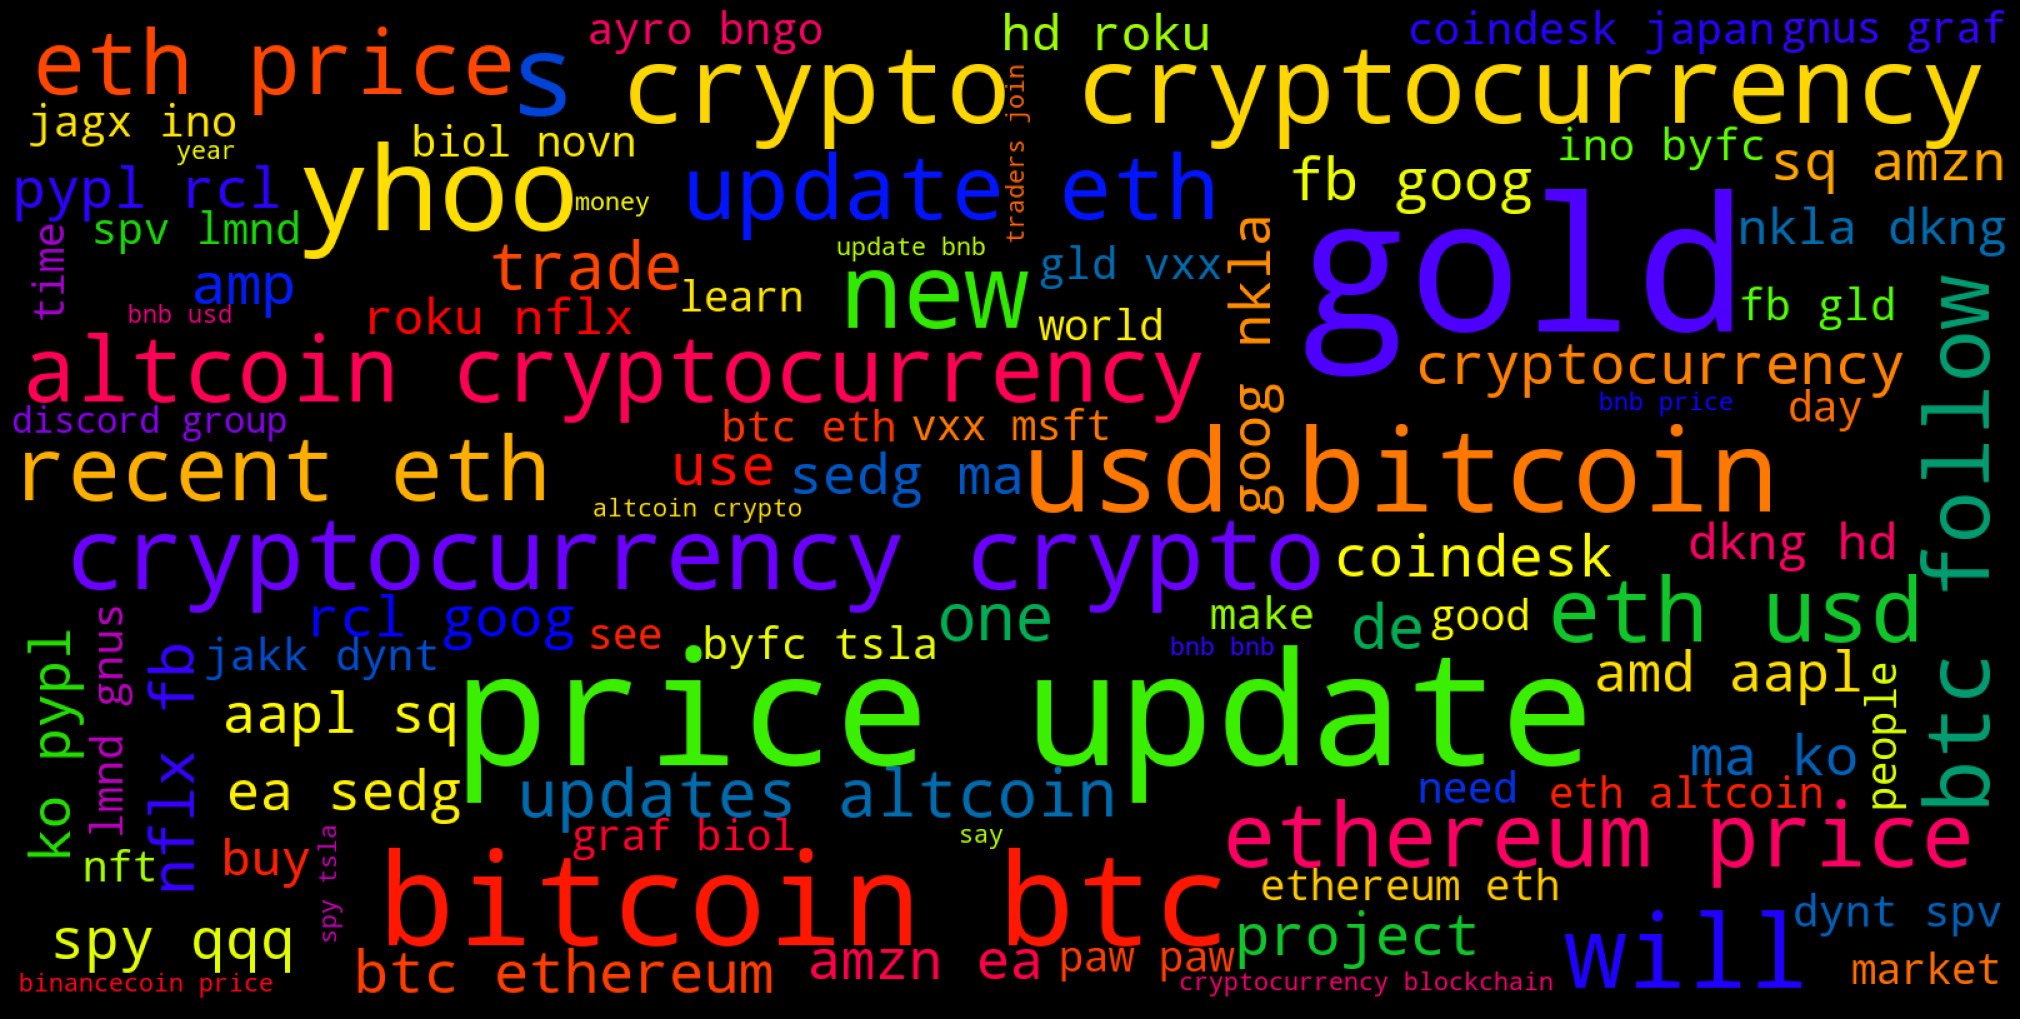

In [195]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

word_cloud(df['text'].values)

In [196]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
allWords = ' '.join([twts for twts in df['text']])
tokens = word_tokenize(allWords)
word_filtered = [w.lower() for w in tokens if w not in stopwords]

In [197]:
word_filtered

['treatsbot',
 'paw',
 'paw',
 'altcoin',
 'ethereum',
 'price',
 'update',
 'eth',
 'usd',
 'bitcoin',
 'btc',
 'follow',
 'recent',
 'eth',
 'price',
 'updates',
 'altcoin',
 'cryptocurrency',
 'crypto',
 'saylor',
 'amritaahuja',
 'earn',
 'daily',
 'trading',
 'altcoin',
 'futures',
 'using',
 'special',
 'callsi',
 'accurate',
 'callsatleast',
 'profitable',
 'calls',
 'daily',
 'guaranteedjoin',
 'us',
 'using',
 'link',
 'ethereum',
 'price',
 'update',
 'eth',
 'usd',
 'bitcoin',
 'btc',
 'follow',
 'recent',
 'eth',
 'price',
 'updates',
 'altcoin',
 'cryptocurrency',
 'crypto',
 'rovercrc',
 'earn',
 'daily',
 'trading',
 'altcoin',
 'futures',
 'using',
 'special',
 'callsi',
 'accurate',
 'callsatleast',
 'profitable',
 'calls',
 'daily',
 'guaranteedjoin',
 'us',
 'using',
 'link',
 'shibtoken',
 'goonrich',
 'crypticmaestro',
 'godreviews',
 'bruiserscalls',
 'shflcn',
 'shibfalcon',
 'shib',
 'bsc',
 'memecoins',
 'altcoin',
 'bscgems',
 'bscgemsalert',
 'crypto',
 'bina

In [198]:
import nltk

counter_dict = nltk.FreqDist(word_filtered)
print(counter_dict.most_common(200))

[('cryptocurrency', 1311), ('gold', 1070), ('crypto', 974), ('bitcoin', 935), ('goog', 813), ('price', 636), ('altcoin', 626), ('btc', 605), ('eth', 602), ('coindesk', 586), ('spy', 566), ('tsla', 555), ('aapl', 518), ('ethereum', 460), ('amzn', 436), ('trading', 404), ('msft', 367), ('appl', 361), ('fb', 337), ('follow', 328), ('join', 328), ('yhoo', 317), ('bnb', 306), ('nflx', 274), ('blockchain', 270), ('usd', 265), ('updates', 261), ('recent', 258), ('update', 245), ('ayro', 243), ('amd', 236), ('qqq', 233), ('dkng', 230), ('us', 229), ('discord', 218), ('binance', 217), ('project', 191), ('link', 189), ('paw', 186), ('new', 183), ('bngo', 179), ('amp', 167), ('like', 165), ('pypl', 163), ('good', 162), ('nvda', 160), ('cryptonews', 159), ('get', 159), ('nkla', 159), ('daily', 158), ('group', 156), ('baba', 155), ('nft', 151), ('ba', 150), ('news', 149), ('week', 149), ('de', 148), ('nio', 147), ('roku', 146), ('bank', 145), ('stock', 144), ('gld', 144), ('boxl', 143), ('sq', 143)

In [199]:
most_frq_words

['cryptocurrency',
 'gold',
 'crypto',
 'bitcoin',
 'goog',
 'price',
 'altcoin',
 'btc',
 'eth',
 'coindesk',
 'spy',
 'tsla',
 'aapl',
 'ethereum',
 'amzn',
 'trading',
 'msft',
 'appl',
 'fb',
 'follow',
 'join',
 'yhoo',
 'bnb',
 'nflx',
 'blockchain',
 'usd',
 'updates',
 'recent',
 'update',
 'ayro',
 'amd',
 'qqq',
 'dkng',
 'us',
 'discord',
 'binance',
 'project',
 'link',
 'paw',
 'new',
 'bngo',
 'amp',
 'like',
 'pypl',
 'good',
 'nvda',
 'cryptonews',
 'get',
 'nkla',
 'daily',
 'group',
 'baba',
 'nft',
 'ba',
 'news',
 'week',
 'de',
 'nio',
 'roku',
 'bank',
 'stock',
 'gld',
 'boxl',
 'sq',
 'novn',
 'earn',
 'gnus',
 'biol',
 'chfs',
 'one',
 'n',
 'go',
 'community',
 'money',
 'trade',
 'ai',
 'ea',
 'hd',
 'profitable',
 'nfts',
 'market',
 'top',
 'make',
 'options',
 'best',
 'twtr',
 'ko',
 'free',
 'usdc',
 'web',
 'japan',
 'shop',
 'first',
 'apt',
 'use',
 'intc',
 'see',
 'thanks',
 'rcl',
 'signals',
 'sedg',
 'solo',
 'ino',
 'dynt',
 'spv',
 'jagx',
 'by

In [200]:
allfreqWords = ' '.join([twts for twts in most_frq_words]) 

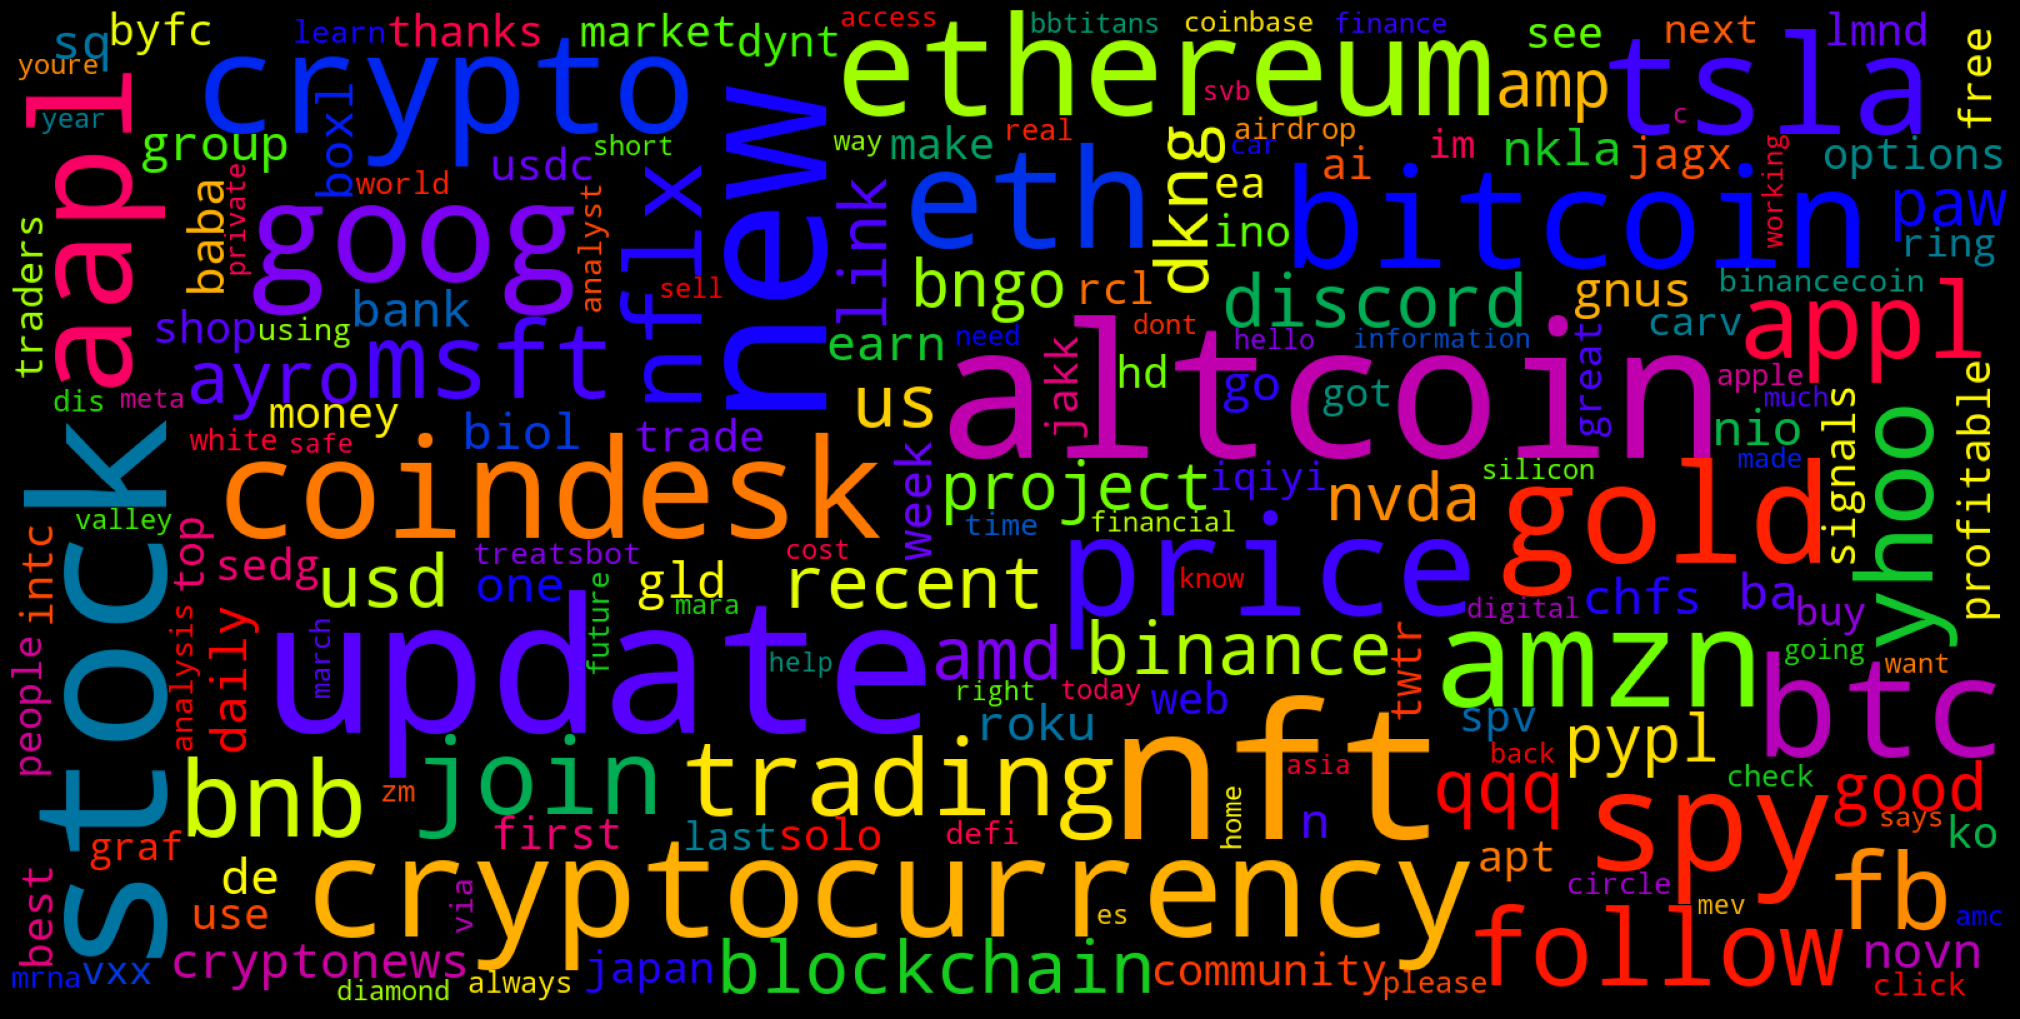

In [201]:
wordCloud = WordCloud(background_color='black',width = 1600, height = 800,min_font_size = 20,max_font_size=150,colormap='prism').generate(allfreqWords)
fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)
ax.axis("off")
fig.tight_layout(pad=0)
plt.show()


### THANK YOU